In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle

In [5]:
df=pd.read_csv("large_house_price_dataset.csv")

In [4]:
df

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562
...,...,...,...,...,...,...,...
4995,3300,2,2,2,2,26,20789932
4996,771,2,4,3,1,0,6675496
4997,2322,5,4,3,2,6,17099165
4998,3485,2,2,1,0,21,21569046


In [6]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562


In [7]:
df.shape

(5000, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       5000 non-null   int64
 1   Bedrooms   5000 non-null   int64
 2   Bathrooms  5000 non-null   int64
 3   Floors     5000 non-null   int64
 4   Parking    5000 non-null   int64
 5   Age        5000 non-null   int64
 6   Price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [9]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2272.444600,2.985000,2.494000,2.001600,1.001000,14.422200,1.510591e+07
std,1005.817287,1.412648,1.130584,0.813222,0.812608,8.619884,6.087296e+06
min,500.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.148928e+06
25%,1413.750000,2.000000,1.000000,1.000000,0.000000,7.000000,9.938504e+06
50%,2287.000000,3.000000,3.000000,2.000000,1.000000,15.000000,1.521962e+07
75%,3145.000000,4.000000,4.000000,3.000000,2.000000,22.000000,2.033671e+07
max,3999.000000,5.000000,4.000000,3.000000,2.000000,29.000000,2.750898e+07


In [10]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
Parking      0
Age          0
Price        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

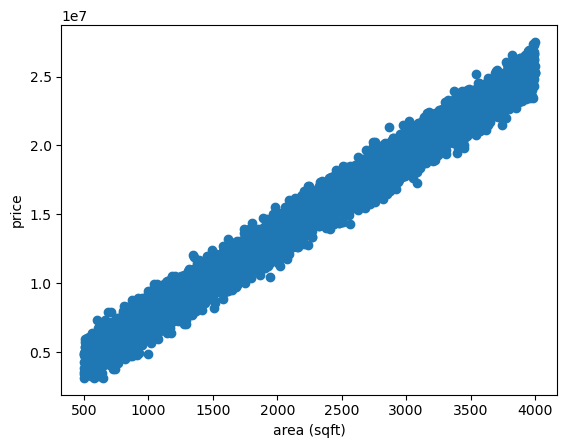

In [13]:
plt.scatter(df['Area'],df['Price'])
plt.xlabel("area (sqft)")
plt.ylabel("price")
plt.show()

In [14]:
x=df[['Area',"Bedrooms","Floors","Parking","Age"]]
y=df["Price"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [18]:
print("Train R2:", r2_score(y_train,y_train_pred))
print("Test R2:",r2_score(y_test,y_test_pred))

Train R2: 0.9947587519711171
Test R2: 0.9943455868156269


In [19]:
mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 372872.2212350993
MSE: 203694220449.6046
RMSE: 451324.9610309678


In [20]:
ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
print("Ridge R2:",r2_score(y_test,ridge_pred))

Ridge R2: 0.9943455652956704


In [21]:
x_train.shape

(4000, 5)

In [22]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print("Lasso R2:",r2_score(y_test,lasso_pred))

Lasso R2: 0.994345586673481


In [23]:
models={
    "Linear":r2_score(y_test,y_test_pred),
    "Ridge":r2_score(y_test,ridge_pred),
    "Lasso":r2_score(y_test,lasso_pred)
}
models

{'Linear': 0.9943455868156269,
 'Ridge': 0.9943455652956704,
 'Lasso': 0.994345586673481}

In [24]:
with open("model.pkl","wb") as file:
    pickle.dump(ridge,file)
print("model saved successfully") 

model saved successfully
